In [322]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as sm


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz 
from sklearn import tree
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier


from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [323]:
vp = pd.read_csv('Voter-Persuasion.csv')
vpr = vp.copy()

In [324]:
vp.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,CAND1S,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,0,0,4,26,2,59954,79,21,0,0,7,20,64,11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,40,20,2,0,0,0,3997,0,0,1,6,1,1,0,0,1,7,2,1,1,1,11,S,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,0,0,5,10,1,56196,74,22,1,1,16,61,54,14,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,7,2,3,5,7,58950,76,5,11,3,25,50,54,15,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,33,20,80,50,4,1,1,0,4217,0,0,0,1,1,0,0,0,0,1,0,0,1,1,12,S,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,4,0,3,27,4,54809,71,2,2,6,30,35,62,39,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,100,50,5,0,0,0,3434,0,0,0,1,0,0,0,0,0,1,0,0,1,1,15,S,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,0,0,8,6,12,75063,92,4,2,0,24,50,50,19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,100,50,1,0,0,0,1215,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,1,0,N,N,N,N,0,1,T


In [325]:
vp.drop(['VOTER_ID', 'MOVED_AD', 'opposite', 'MESSAGE_A_REV'], axis = 1, inplace = True)
vpr.drop(['VOTER_ID', 'MOVED_AD', 'opposite', 'MESSAGE_A'], axis = 1, inplace = True)

In [326]:
vpr.head()

,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,CAND1S,CAND2S,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_A,Partition
0,2,0,28,1,1,1,37,61,34,0,0,4,26,2,59954,79,21,0,0,7,20,64,11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,40,20,2,0,0,0,3997,0,0,1,6,1,1,0,0,1,7,2,1,1,1,11,S,S,0,N,N,N,0,V
1,1,0,53,2,0,0,46,87,8,0,0,5,10,1,56196,74,22,1,1,16,61,54,14,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,258,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,0,N,N,N,0,T
2,2,0,68,2,1,0,41,23,64,7,2,3,5,7,58950,76,5,11,3,25,50,54,15,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,33,20,80,50,4,1,1,0,4217,0,0,0,1,1,0,0,0,0,1,0,0,1,1,12,S,L,0,N,N,N,1,T
3,1,0,66,0,2,0,35,53,29,4,0,3,27,4,54809,71,2,2,6,30,35,62,39,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,100,50,5,0,0,0,3434,0,0,0,1,0,0,0,0,0,1,0,0,1,1,15,S,S,0,N,N,N,0,T
4,3,0,23,0,3,1,42,74,18,0,0,8,6,12,75063,92,4,2,0,24,50,50,19,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,100,50,1,0,0,0,1215,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,0,N,N,N,0,T


In [327]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [328]:
vp.sample(5)

,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,CAND1S,CAND2S,MESSAGE_A,I3,CAND1_UND,CAND2_UND,MOVED_A,Partition
3154,3,0,32,0,0,1,53,97,2,0,0,1,16,0,94196,90,8,0,0,14,45,42,31,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3268,0,0,1,2,1,0,0,0,0,1,0,0,1,1,15,L,U,1,Y,N,Y,1,V
7712,3,0,81,2,0,0,41,61,23,3,1,10,12,4,61152,90,9,0,0,20,65,59,15,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,50,0,20,100,60,5,0,1,1,19533,1,0,1,2,1,0,0,0,0,1,0,1,0,0,12,U,S,0,N,Y,N,1,V
1829,2,0,46,3,0,0,37,61,34,0,0,4,26,2,59954,79,21,0,0,7,20,64,11,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1439,0,0,0,1,0,0,0,0,0,1,0,0,0,0,12,S,S,1,N,N,N,0,T
6860,3,0,41,1,0,2,38,85,4,4,8,0,16,5,84333,84,8,4,1,11,52,50,44,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7841,0,0,1,2,1,0,0,0,0,1,0,1,1,1,15,U,S,0,Y,Y,N,1,V
2611,3,0,50,1,1,0,45,87,4,4,3,3,11,7,95272,86,6,2,0,20,63,62,31,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,50,0,20,80,50,4,0,1,1,4953,0,0,1,2,1,0,0,0,0,1,0,1,1,1,13,L,S,1,N,N,N,1,V


In [329]:
A = len(vp[(vp['MESSAGE_A'] == 1 ) & (vp['MOVED_A'] == 1)])
B = len(vp)
C= A/B * 100
print('The percentage of voters who got the flyer and moved is: ' + str(C))

The percentage of voters who got the flyer and moved is: 20.119999999999997


In [330]:
D = len(vp[(vp['MESSAGE_A'] == 0 ) & (vp['MOVED_A'] == 1)])
E = len(vp)
F= D/E * 100
print('The percentage of voters who did not get the flyer and moved is: ' + str(F))

The percentage of voters who did not get the flyer and moved is: 17.22


The flyer did a good job in moving about 20% of the total number of voters who got the flyer as against the 17% who didn't get it and still moved

In [331]:
vp['CAND1S'].unique()

array(['S', 'U', 'L'], dtype=object)

In [332]:
vp['CAND2S'].unique()

array(['S', 'L', 'U'], dtype=object)

In [333]:
vp['I3'].unique()

array(['N', 'Y'], dtype=object)

In [334]:
vp['CAND1_UND'].unique()

array(['N', 'Y'], dtype=object)

In [335]:
vp['CAND2_UND'].unique()

array(['N', 'Y'], dtype=object)

In [336]:
vp['Partition'].unique()

array(['V', 'T'], dtype=object)

In [337]:
vp['CAND1S'] = vp['CAND1S'].astype('category')
vp['CAND2S'] = vp['CAND2S'].astype('category')
vp['I3'] = vp['I3'].astype('category')
vp['CAND1_UND'] = vp['CAND1_UND'].astype('category')
vp['CAND2_UND'] = vp['CAND2_UND'].astype('category')
vp['Partition'] = vp['Partition'].astype('category')


vpr['CAND1S'] = vpr['CAND1S'].astype('category')
vpr['CAND2S'] = vpr['CAND2S'].astype('category')
vpr['I3'] = vpr['I3'].astype('category')
vpr['CAND1_UND'] = vpr['CAND1_UND'].astype('category')
vpr['CAND2_UND'] = vpr['CAND2_UND'].astype('category')
vpr['Partition'] = vpr['Partition'].astype('category')

In [338]:
vp = pd.get_dummies(vp, drop_first = True)
vpr = pd.get_dummies(vpr, drop_first = True)

In [339]:
vp_corr = vp.corr()

In [340]:
vp_corr

,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,NH_ASIAN,NH_MULT,HISP,COMM_LT10,COMM_609P,MED_HH_INC,COMM_CAR,COMM_CP,COMM_PT,COMM_WALK,KIDS,M_MAR,F_MAR,ED_4COL,GENDER_F,GENDER_M,H_AFDLN3P,H_F1,H_M1,H_MFDLN3P,PARTY_D,PARTY_I,PARTY_R,VPP_08,VPP_12,VPR_08,VPR_10,VPR_12,VG_04,VG_06,VG_08,VG_10,VG_12,PP_PELIG,PR_PELIG,AP_PELIG,G_PELIG,E_PELIG,NL5G,NL3PR,NL5AP,NL2PP,REG_DAYS,UPSCALEBUY,UPSCALEMAL,UPSCALEFEM,BOOKBUYERI,FAMILYMAGA,FEMALEORIE,RELIGIOUSM,GARDENINGM,CULINARYIN,HEALTHFITN,DOITYOURSE,FINANCIALM,RELIGIOUSC,POLITICALC,MEDIANEDUC,MESSAGE_A,MOVED_A,CAND1S_S,CAND1S_U,CAND2S_S,CAND2S_U,I3_Y,CAND1_UND_Y,CAND2_UND_Y,Partition_V
SET_NO,1.000000,-0.003911,-0.005876,0.001167,-0.024635,0.009744,0.016761,0.008178,-0.000819,-0.013291,-0.011468,-0.007237,0.006664,-0.007176,-0.004025,0.011594,0.000855,-0.019042,-0.005913,-0.003139,0.014828,0.011754,-0.014387,-0.015723,0.015723,0.003904,-0.008720,0.012059,-0.018450,-0.005383,0.021455,-0.014036,-0.015916,0.004617,-0.012181,-0.014031,-0.003456,-0.006144,-0.021548,-0.006617,-0.010680,-0.014172,-0.011114,-0.012040,-0.011458,-0.016840,-0.018566,-0.014978,-0.012903,-0.013498,-0.011040,-0.009740,-0.005725,0.014287,0.003632,-0.002264,-0.002985,-0.015114,0.006936,0.005871,-0.002355,-0.002426,0.001605,-0.001187,-0.011441,-0.010636,-0.002419,-0.005502,0.005553,-0.014160,0.005984,-0.003954,-0.000957,0.021131,0.005984,-0.000957,0.003759
OPP_SEX,-0.003911,1.000000,0.009523,-0.003552,0.015257,0.002180,0.002029,0.012733,-0.003313,0.009011,0.012043,-0.026152,-0.004011,0.011998,0.014364,0.017762,-0.013530,-0.018776,-0.003819,0.016404,0.022644,0.005899,0.010380,-0.000768,0.000768,0.008550,-0.019370,0.000033,0.019181,-0.008758,-0.000129,0.011444,0.008113,0.013767,-0.003038,0.007385,0.001440,0.003755,0.008398,-0.014543,-0.006857,-0.024293,0.011269,0.000564,0.003595,-0.014082,-0.009582,-0.008186,0.002430,0.006945,0.012442,-0.004772,0.005789,-0.012264,-0.006777,-0.004772,0.003019,-0.012027,-0.001885,-0.012075,-0.012004,-0.000322,-0.010925,0.016420,-0.003176,-0.001304,0.014092,-0.012043,-0.006487,0.018930,-0.009495,0.003711,-0.002232,-0.001862,-0.009495,-0.002232,0.002146
AGE,-0.005876,0.009523,1.000000,-0.111906,-0.030063,-0.092572,0.098188,0.073202,-0.073316,-0.009158,-0.014134,-0.016145,0.092120,-0.072596,0.010759,0.004094,0.027531,-0.079661,-0.000581,-0.060163,0.038758,0.066379,0.018193,0.014716,-0.014716,-0.004138,0.120103,0.040525,-0.071589,0.002052,-0.064169,0.067750,0.258580,0.160350,0.272571,0.270571,0.210487,0.403527,0.419221,0.336513,0.378432,0.245178,0.276011,0.308909,0.316450,0.332840,0.345804,0.455624,0.323560,0.339335,0.278858,0.266400,0.047765,0.063871,0.071326,0.069181,0.051776,0.077682,0.000761,0.076815,0.086079,0.076943,0.098017,0.081000,0.004413,0.018986,0.025479,0.012512,-0.026237,-0.001714,0.065583,-0.008637,0.000736,-0.074026,0.065583,0.000736,0.002166
HH_ND,0.001167,-0.003552,-0.111906,1.000000,-0.280483,-0.074276,-0.083083,-0.169724,0.165693,0.047189,-0.024447,0.026853,-0.119120,0.051022,-0.042685,-0.108384,-0.042078,0.214261,0.088951,0.033727,-0.125144,-0.104730,-0.030464,0.022807,-0.022807,0.081234,-0.185101,-0.161920,0.151165,0.623973,-0.273481,-0.422504,0.098605,-0.178097,0.086153,-0.122389,0.065635,-0.079142,-0.072986,-0.051698,-0.065217,-0.028607,-0.002154,0.017251,0.015423,-0.049271,-0.020544,-0.076350,0.011734,0.010218,0.005196,-0.042373,-0.005311,-0.015863,-0.041147,-0.021512,0.013839,-0.025130,-0.007209,-0.029602,-0.035842,0.008385,-0.036379,-0.056621,0.030113,0.032243,-0.077080,-0.024734,0.259323,-0.363547,0.253566,-0.034837,0.017051,-0.282650,0.253566,0.017051,0.004010
HH_NR,-0.024635,0.015257,-0.030063,-0.280483,1.000000,0.018820,0.037958,0.105956,-0.092937,-0.030224,0.002499,-0.030513,0.089188,-0.016106,0.024356,0.053064,0.041850,-0.150320,-0.028500,-0.007516,0.073881,0.060625,0.006245,-0.055824,0.055824,-0.017107,-0.172241,-0.114502,-0.009875,-0.455207,-0.181781,0.681573,-0.002427,0.262509,-0.030344,0.209029,-0.001025,0.038231,0.051019,0.011026,0.038860,0.0163

In [341]:
#using the above table and removing the effect of multicollinearity, 
#let's assume these variables have a good predictive potential:
#HH_ND          0.259323
#HH_NR         -0.279504
#NH_WHITE      -0.096613
#PARTY_R       -0.415191
#VPP_08         0.115435
#UPSCALEMAL    -0.005611
#MESSAGE_A      0.059954
#MOVED_A        1.000000
#CAND1S_S      -0.657461
#CAND2S_S      -0.187660
#CAND1_UND_Y    0.366541

In [342]:
variables = ['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL','MESSAGE_A','CAND1S_S','CAND2S_S', 'CAND1_UND_Y']
X = vp[variables]
y = vp['MOVED_A']

In [343]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [344]:
# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [345]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)

In [346]:
classificationSummary(valid_y, logit_reg_pred)

Confusion Matrix (Accuracy 0.8250)

       Prediction
Actual    0    1
     0 1932  536
     1  164 1368


In [347]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs',
                    random_state=1)
clf.fit(train_X, train_y.values)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=2, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [348]:
net_pred = clf.predict(valid_X)
net_pred_proba = clf.predict_proba(valid_X)

In [349]:
classificationSummary(valid_y, net_pred)

Confusion Matrix (Accuracy 0.8600)

       Prediction
Actual    0    1
     0 1917  551
     1    9 1523


[Text(223.2, 362.4, 'CAND1S_S <= 0.5\ngini = 0.465\nsamples = 6000\nvalue = [3798, 2202]'),
 Text(111.6, 217.44, 'CAND2S_S <= 0.5\ngini = 0.407\nsamples = 2717\nvalue = [774, 1943]'),
 Text(55.8, 72.47999999999996, 'gini = 0.495\nsamples = 911\nvalue = [500, 411]'),
 Text(167.39999999999998, 72.47999999999996, 'gini = 0.257\nsamples = 1806\nvalue = [274, 1532]'),
 Text(334.79999999999995, 217.44, 'CAND2S_S <= 0.5\ngini = 0.145\nsamples = 3283\nvalue = [3024, 259]'),
 Text(279.0, 72.47999999999996, 'gini = 0.217\nsamples = 283\nvalue = [35, 248]'),
 Text(390.59999999999997, 72.47999999999996, 'gini = 0.007\nsamples = 3000\nvalue = [2989, 11]')]

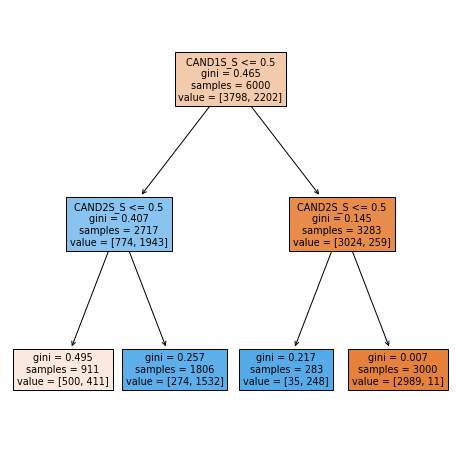

In [350]:
#train model with a decision tree classifier
smallClassTree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plt.figure(figsize = (8,8))
tree.plot_tree(smallClassTree, feature_names=train_X.columns, filled = True)

In [351]:
tree_pred = smallClassTree.predict(valid_X)
tree_pred_proba = smallClassTree.predict_proba(valid_X)

In [352]:
classificationSummary(valid_y, tree_pred)

Confusion Matrix (Accuracy 0.8720)

       Prediction
Actual    0    1
     0 2275  193
     1  319 1213


In terms of predictive power, the best model is the decision tree classifier model. It was chosen cos it has the highest accuracy

In [353]:
tree_pred_proba = pd.DataFrame(tree_pred_proba)

In [354]:
#Using a cut-off of 0.5,We report the propsensities for the first three records in the validation set for the decision tree model
tree_pred_proba.head(3)

,0,1
0,0.548847,0.451153
1,0.996333,0.003667
2,0.151717,0.848283


In [355]:
#The first record has a greater propensity of not moving in favour of a democratic candidate
#The second record has a nearly 100% propensity of not moving in favour of a democratic candidate
#The third record has a greater propensity of moving in favour of a democratic candidate

In [356]:
rvariables = ['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL','MESSAGE_A_REV','CAND1S_S','CAND2S_S', 'CAND1_UND_Y']
A = vpr[rvariables]
b = vpr['MOVED_A']

In [357]:
train_A, valid_A, train_b, valid_b = train_test_split(A, b, test_size = 0.4, random_state = 1)

[Text(223.2, 362.4, 'CAND1S_S <= 0.5\ngini = 0.465\nsamples = 6000\nvalue = [3798, 2202]'),
 Text(111.6, 217.44, 'CAND2S_S <= 0.5\ngini = 0.407\nsamples = 2717\nvalue = [774, 1943]'),
 Text(55.8, 72.47999999999996, 'gini = 0.495\nsamples = 911\nvalue = [500, 411]'),
 Text(167.39999999999998, 72.47999999999996, 'gini = 0.257\nsamples = 1806\nvalue = [274, 1532]'),
 Text(334.79999999999995, 217.44, 'CAND2S_S <= 0.5\ngini = 0.145\nsamples = 3283\nvalue = [3024, 259]'),
 Text(279.0, 72.47999999999996, 'gini = 0.217\nsamples = 283\nvalue = [35, 248]'),
 Text(390.59999999999997, 72.47999999999996, 'gini = 0.007\nsamples = 3000\nvalue = [2989, 11]')]

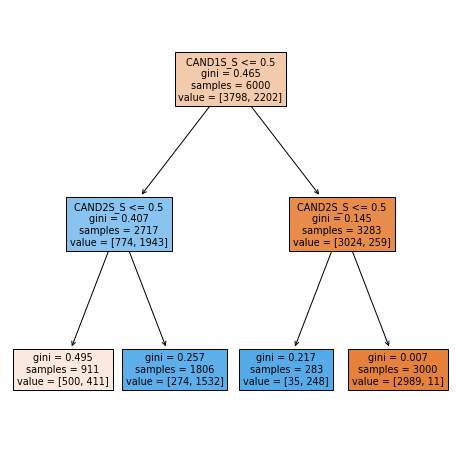

In [358]:
#train model with a decision tree classifier
rsmallClassTree = tree.DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
rsmallClassTree.fit(train_A, train_b)

plt.figure(figsize = (8,8))
tree.plot_tree(rsmallClassTree, feature_names=train_A.columns, filled = True)

In [359]:
rtree_pred = rsmallClassTree.predict(valid_A)
rtree_pred_proba = rsmallClassTree.predict_proba(valid_A)

In [360]:
classificationSummary(valid_b, rtree_pred)

Confusion Matrix (Accuracy 0.8720)

       Prediction
Actual    0    1
     0 2275  193
     1  319 1213


In [361]:
rtree_pred_proba = pd.DataFrame(rtree_pred_proba)

In [362]:
rtree_pred_proba.head(3)

,0,1
0,0.548847,0.451153
1,0.996333,0.003667
2,0.151717,0.848283


In [363]:
#The first record has a greater propensity of not moving in favour of a democratic candidate
#The second record has a nearly 100% propensity of not moving in favour of a democratic candidate
#The third record has a greater propensity of moving in favour of a democratic candidate

##These propensities are same as when flyer was used

In [364]:
train_X.columns

Index(['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL',
       'MESSAGE_A', 'CAND1S_S', 'CAND2S_S', 'CAND1_UND_Y'],
      dtype='object')

In [365]:
train_A.columns

Index(['HH_ND', 'NH_WHITE', 'HH_NR', 'PARTY_R', 'VPP_08', 'UPSCALEMAL',
       'MESSAGE_A_REV', 'CAND1S_S', 'CAND2S_S', 'CAND1_UND_Y'],
      dtype='object')

In [372]:
#compute the uplift for each of the voters in the validation set, and report the uplift for the first three records
uplift_df = valid_X.copy()  # Need to create a copy to allow modifying data

uplift_df.MESSAGE_A = 1
predTreatment = smallClassTree.predict_proba(uplift_df)
uplift_df.MESSAGE_A = 0
predControl = smallClassTree.predict_proba(uplift_df)

upliftResult_df = pd.DataFrame({
    'probMessage': predTreatment[:,1],
    'probNoMessage': predControl[:,1],
    'uplift': predTreatment[:,1] - predControl[:,1],
    }, index=uplift_df.index)
print(upliftResult_df.head(3))

      probMessage  probNoMessage  uplift
9953     0.451153       0.451153     0.0
3850     0.003667       0.003667     0.0
4962     0.848283       0.848283     0.0


The uplift for the first three voters in the validation set is 0. This means there isn't a need to waste money on flyers for new voters. A good number of them will move with or without the flyer.

Remember,the percentage of voters who got the flyer and moved is: 20.119999999999997 and the percentage of voters who did not get the flyer and moved is: 17.22

In [373]:
#If a campaign has the resources to mail the flyer only to 10% of the voters, what uplift cutoff should be used?